In [1]:
import os
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
path = 'Final/openface_data'
os.listdir(path)

['anger.csv',
 'contempt.csv',
 'disgust.csv',
 'fear.csv',
 'happy.csv',
 'sadness.csv',
 'surprise.csv']

In [3]:
df = pd.read_csv(path+"/disgust.csv")
arr = np.ones(len(df)) #arr=1
df["disg"] = arr 
df.head()


,frame,face_id,timestamp,confidence,success,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,...,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,disg
0,1,0,0.0,0.03,1,0.230804,-0.045825,-0.971921,-0.129892,-0.016743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,0,0.0,0.03,0,0.274030,-0.049013,-0.960471,-0.117138,-0.020834,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,0,0.0,0.03,0,0.237362,-0.024020,-0.971124,-0.131606,0.004934,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,0,0.0,0.03,0,0.329407,-0.083490,-0.940490,-0.174217,0.044338,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,0,0.0,0.03,0,0.217951,-0.020905,-0.975736,-0.133093,0.004112,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [4]:
other = [
    'anger.csv',
    'contempt.csv',
    'fear.csv',
    'happy.csv',
    'sadness.csv',
    'surprise.csv'
]
for file in other:
    df1 = pd.read_csv(path+"/"+file)
    print(file, len(df1))
    ar = np.zeros(len(df1))
    df1['disg'] = ar
    df = df.append(df1)
label = df['disg']
len(df)


anger.csv 135
contempt.csv 54
fear.csv 75
happy.csv 207
sadness.csv 84
surprise.csv 249


981

In [5]:
a = df[df[' confidence']>0.3]
len(a[a['disg']==1]), len(a)

(69, 369)

In [6]:
au=[]
for i in a.keys():
    if 'AU' in i:
        au.append(i)
au.append('disg')        
d = a[au]
d = d.reset_index(drop=True)
d

,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,...,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,disg
0,0.00,0.0,0.00,0.00,0.71,1.36,0.00,0.07,0.15,0.40,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.00,0.0,0.00,0.00,1.12,2.21,0.00,0.07,0.21,0.68,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.00,0.0,0.00,0.00,1.28,2.54,0.14,0.21,0.26,0.57,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.00,0.0,0.00,0.00,0.92,1.85,0.14,0.17,0.16,0.35,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.06,0.0,0.00,0.00,0.94,1.47,0.00,0.35,0.30,0.73,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,0.00,0.0,0.00,0.94,0.00,0.15,0.13,0.00,0.34,0.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
365,0.00,0.0,0.00,0.94,0.00,0.15,0.13,0.00,0.34,0.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
366,0.00,0.0,0.02,0.00,0.03,0.15,0.15,0.00,0.14,0.96,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
367,0.00,0.0,0.02,0.00,0.03,0.19,0.15,0.00,0.24,1.42,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
label = d['disg']
au.remove('disg')
print(len(d[d['disg']==1]))
d= d[au]
len(d), len(label)

69


(369, 369)

In [8]:
#splitting the model into training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    d, 
    label, 
    test_size=0.30, 
    random_state=101
)

In [9]:
#training a logistics regression model
logmodel = LogisticRegression(max_iter=10000)
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print("F-1 Score: {:.3f}\t Accuracy: {:.3f}".format(f1_score(y_test,predictions), accuracy_score(y_test,predictions)))

F-1 Score: 0.444	 Accuracy: 0.820


In [10]:
def init_pop(size, n_feat, segment):
    features_arr=[]
    for i in range(size):
        features = [True if i < n_feat*segment else False for i in range(n_feat)]
        random.shuffle(features)
        features_arr.append(features)
    return features_arr                   

In [11]:
def fitness_score(features_arr):
    scores = []
    for features in features_arr:
        logmodel = LogisticRegression(max_iter=10000)
        logmodel.fit(X_train.iloc[:,features],y_train)
        predictions = logmodel.predict(X_test.iloc[:,features])
        scores.append(f1_score(y_test,predictions))
    scores, features_arr = np.array(scores), np.array(features_arr) 
    indexs = np.argsort(scores)[::-1]
    best_features = []
    best_scores = []
    for i in indexs:
        best_features.append(features_arr[i])
        best_scores.append(scores[i])
    return best_scores, best_features

In [12]:
def selection(best_of_population, n_parents):
    return best_of_population[:n_parents]

In [13]:
def crossover(population, multiply):
    features_arr_nextgen=population.copy()
    for j in range(multiply):
        arr = population.copy()
        for i in range(0, len(arr)-1, 2):
            rand = int(random.uniform(0, len(arr)))
            temp = list(arr[i][:rand]) + list(arr[i+1][rand:])
            arr[i+1]=list(arr[i+1][:rand]) + list(arr[i][rand:])
            arr[i] = temp
        for iarr in arr:
            features_arr_nextgen.append(iarr)
    return features_arr_nextgen

In [14]:
def mutation(population,mutation_rate):
    features_arr_nextgen = []
    for i in range(0,len(population)):
        features = population[i]
        for j in range(len(features)):
            if random.random() < mutation_rate:
                features[j]= not features[j]
        features_arr_nextgen.append(features)
    return features_arr_nextgen

In [15]:
def generations(size, n_feat, n_parents, mutation_rate, n_gen, segment, multiply, X_train, X_test, y_train, y_test):
    best_individual= []
    best_score= []
    features_arr_nextgen=init_pop(size, n_feat, segment)
    for i in range(n_gen):
        scores, best_of_population = fitness_score(features_arr_nextgen)
        best_individual.append(best_of_population[0].copy())
        best_score.append(scores[0])
        selected_population = selection(best_of_population,n_parents)
        crossovered_population = crossover(selected_population, multiply)
        features_arr_nextgen = mutation(crossovered_population, mutation_rate)
        features = best_individual[-1]
        logmodel = LogisticRegression(max_iter=10000)
        logmodel.fit(X_train.iloc[:,features],y_train)
        predictions = logmodel.predict(X_test.iloc[:,features])
        print("Generation: {} \tfeatures: {} \tf1-Score: {:.3f} \tAccuracy Score: {:.3f}".format(i, sum(best_individual[-1]), scores[0], accuracy_score(y_test, predictions)))
    
    best_s = best_score[0]
    best_c = best_individual[0]
    for i in range(1, len(best_individual)):
        if best_s<best_score[i]:
            best_s = best_score[i]
            best_c = best_individual[i]
        elif best_s == best_score[i]:
            if sum(best_individual[i]) < sum(best_c):
                best_c = best_individual[i]
    return best_c, best_score

In [16]:
%%time
best_c, history = generations(
    size=200,
    n_feat=35,
    n_parents=100,
    mutation_rate=0.05,
    n_gen=30,
    segment=0.4,
    multiply=2, 
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test   
)

Generation: 0 	features: 14 	f1-Score: 0.467 	Accuracy Score: 0.856
Generation: 1 	features: 15 	f1-Score: 0.516 	Accuracy Score: 0.865
Generation: 2 	features: 16 	f1-Score: 0.516 	Accuracy Score: 0.865
Generation: 3 	features: 16 	f1-Score: 0.526 	Accuracy Score: 0.838
Generation: 4 	features: 16 	f1-Score: 0.552 	Accuracy Score: 0.883
Generation: 5 	features: 16 	f1-Score: 0.552 	Accuracy Score: 0.883
Generation: 6 	features: 15 	f1-Score: 0.562 	Accuracy Score: 0.874
Generation: 7 	features: 16 	f1-Score: 0.581 	Accuracy Score: 0.883
Generation: 8 	features: 13 	f1-Score: 0.581 	Accuracy Score: 0.883
Generation: 9 	features: 15 	f1-Score: 0.581 	Accuracy Score: 0.883
Generation: 10 	features: 11 	f1-Score: 0.581 	Accuracy Score: 0.883
Generation: 11 	features: 15 	f1-Score: 0.581 	Accuracy Score: 0.883
Generation: 12 	features: 16 	f1-Score: 0.581 	Accuracy Score: 0.883
Generation: 13 	features: 24 	f1-Score: 0.595 	Accuracy Score: 0.865
Generation: 14 	features: 23 	f1-Score: 0.59

In [17]:
best_c

array([False,  True, False,  True, False,  True,  True, False,  True,
       False,  True,  True, False,  True, False,  True, False, False,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True, False, False, False,  True])

In [18]:
features = best_c
logmodel = LogisticRegression(max_iter=10000)
logmodel.fit(X_train.iloc[:,features],y_train)
predictions = logmodel.predict(X_test.iloc[:,features])
f1_score(y_test,predictions), sum(features), accuracy_score(y_test, predictions)

(0.6486486486486486, 21, 0.8828828828828829)

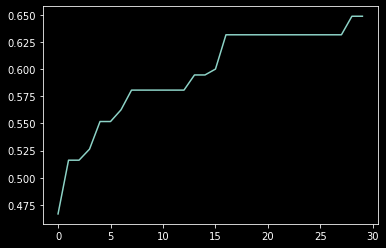

In [19]:
plt.plot(history)